- iris 데이터 중 예측

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).values
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y,
                                                   test_size = 0.2,
                                                   stratify=iris_Y,
                                                   random_state=4)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [4]:
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

0    40
1    40
2    40
dtype: int64

In [5]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

1    10
2    10
0    10
dtype: int64

In [7]:
# 2. 모델 구성 (입력 4개 , 출력 1개)
model = Sequential()
model.add(Dense(units=60,
               input_dim=4,
               activation='relu'))
model.add(Dense(units=50,
               activation='relu'))
model.add(Dense(units=30,
               activation='relu'))
model.add(Dense(units=3,
               activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                300       
                                                                 
 dense_5 (Dense)             (None, 50)                3050      
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 2. 모델 구성 
model = Sequential([
    Input(4, ),
    Dense(units=64, 
          activation='relu'),
    Dense(units=128, 
          activation='relu'),
    Dense(units=32, 
          activation='relu'),
    Dense(units=16, 
          activation='relu'),
    Dense(units=3, 
          activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                320       
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 32)                4128      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 3)                 51        
                                                                 
Total params: 13,347
Trainable params: 13,347
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 3. 모델 학습 과정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [54]:
# 4. 학습 : epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장 콜백 추가
        # 모델을 저장할 경로 : ./model/iris-100-val0.6521.h5
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder) # model_save_folder 가 없으면 폴더 생성
# 조기 종료 콜백
earlystopping = EarlyStopping(patience=100)
# 모델 자동 저장 콜백
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath= file, # 저장경로
                            monitor = 'val_accuracy', # 모니터링 지표 ( 지표가 좋아질때마다 저장)
                            save_best_only = True , # 지표가 개선된 경우만 저장. False면 매번 저장
                            mode = 'max', # 값이 클수록 저장. / 'min' : 값이 작을수록 저장. / auto : 자동으로 알아서...
                            verbose = 1 ) # 개선 저장 로그 출력 (0:출력안함)
hist = model.fit(X_train, Y_train,
                batch_size=50, # 한 배치 사이즈마다 w, b 값 조정
                epochs= 500,
                validation_split=0.2,
                callbacks=[checkpoint, earlystopping]
                )

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0141 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./model\iris-001-val1.0000.h5
2/2 [==============================] - 0s 114ms/step - loss: 0.0563 - accuracy: 0.9896 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0756 - accuracy: 0.9800
Epoch 2: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 52ms/step - loss: 0.0585 - accuracy: 0.9896 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0330 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 58ms/step - loss: 0.0585 - accuracy: 0.9896 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1002 - accuracy: 0.9800
Epoch 4: val_accuracy did not improve from

Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 33ms/step - loss: 0.0620 - accuracy: 0.9896 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0850 - accuracy: 0.9800
Epoch 32: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 37ms/step - loss: 0.0564 - accuracy: 0.9896 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0868 - accuracy: 0.9800
Epoch 33: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 33ms/step - loss: 0.0561 - accuracy: 0.9896 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 34: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - accuracy: 1.0000
Epoch 61: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0616 - accuracy: 0.9896 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0989 - accuracy: 0.9800
Epoch 62: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0565 - accuracy: 0.9896 - val_loss: 0.0382 - val_accuracy: 0.9583
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0838 - accuracy: 0.9600
Epoch 63: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 32ms/step - loss: 0.0572 - accuracy: 0.9792 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - accuracy: 1.0000
Epoch 64: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0865 - accuracy: 0.9600
Epoch 91: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0567 - accuracy: 0.9792 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 90ms/step - loss: 0.0570 - accuracy: 0.9896 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 93: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 71ms/step - loss: 0.0588 - accuracy: 0.9896 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284 - accuracy: 1.0000
Epoch 94: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000
Epoch 121: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0538 - accuracy: 0.9896 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0760 - accuracy: 0.9800
Epoch 122: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 29ms/step - loss: 0.0543 - accuracy: 0.9792 - val_loss: 0.0455 - val_accuracy: 0.9583
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 123: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0556 - accuracy: 0.9792 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 124: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0217 - accuracy: 1.0000
Epoch 151: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 33ms/step - loss: 0.0571 - accuracy: 0.9896 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284 - accuracy: 1.0000
Epoch 152: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0514 - accuracy: 0.9896 - val_loss: 0.0515 - val_accuracy: 0.9583
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0578 - accuracy: 0.9800
Epoch 153: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 33ms/step - loss: 0.0612 - accuracy: 0.9792 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0816 - accuracy: 0.9800
Epoch 154: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0770 - accuracy: 0.9800
Epoch 181: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 74ms/step - loss: 0.0538 - accuracy: 0.9896 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 1.0000
Epoch 182: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 45ms/step - loss: 0.0569 - accuracy: 0.9896 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 183: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 48ms/step - loss: 0.0507 - accuracy: 0.9896 - val_loss: 0.0397 - val_accuracy: 0.9583
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365 - accuracy: 0.9800
Epoch 184: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0359 - accuracy: 1.0000
Epoch 211: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 30ms/step - loss: 0.0504 - accuracy: 0.9896 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0155 - accuracy: 1.0000
Epoch 212: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 30ms/step - loss: 0.0497 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0197 - accuracy: 1.0000
Epoch 213: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0495 - accuracy: 0.9896 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0688 - accuracy: 0.9800
Epoch 214: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0279 - accuracy: 1.0000
Epoch 241: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 30ms/step - loss: 0.0559 - accuracy: 0.9896 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0879 - accuracy: 0.9800
Epoch 242: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 30ms/step - loss: 0.0550 - accuracy: 0.9896 - val_loss: 0.0473 - val_accuracy: 0.9583
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0274 - accuracy: 0.9800
Epoch 243: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 34ms/step - loss: 0.0537 - accuracy: 0.9792 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0716 - accuracy: 0.9800
Epoch 244: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0643 - accuracy: 0.9800
Epoch 271: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0484 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0283 - accuracy: 1.0000
Epoch 272: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 42ms/step - loss: 0.0503 - accuracy: 0.9896 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0213 - accuracy: 1.0000
Epoch 273: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 40ms/step - loss: 0.0483 - accuracy: 0.9896 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - accuracy: 1.0000
Epoch 274: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 301: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0495 - accuracy: 0.9792 - val_loss: 0.0420 - val_accuracy: 0.9583
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0559 - accuracy: 0.9800
Epoch 302: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0550 - accuracy: 0.9792 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 303: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0541 - accuracy: 0.9896 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0837 - accuracy: 0.9800
Epoch 304: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0659 - accuracy: 0.9800
Epoch 331: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0470 - accuracy: 0.9896 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0685 - accuracy: 0.9800
Epoch 332: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0478 - accuracy: 0.9896 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0745 - accuracy: 0.9800
Epoch 333: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 31ms/step - loss: 0.0464 - accuracy: 0.9896 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0719 - accuracy: 0.9800
Epoch 334: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0652 - accuracy: 0.9800
Epoch 361: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 38ms/step - loss: 0.0460 - accuracy: 0.9896 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - accuracy: 0.9800
Epoch 362: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.0473 - accuracy: 0.9896 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0205 - accuracy: 1.0000
Epoch 363: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 37ms/step - loss: 0.0477 - accuracy: 0.9896 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0683 - accuracy: 0.9800
Epoch 364: val_accuracy did not improve from 1.00000
2/2 [===================

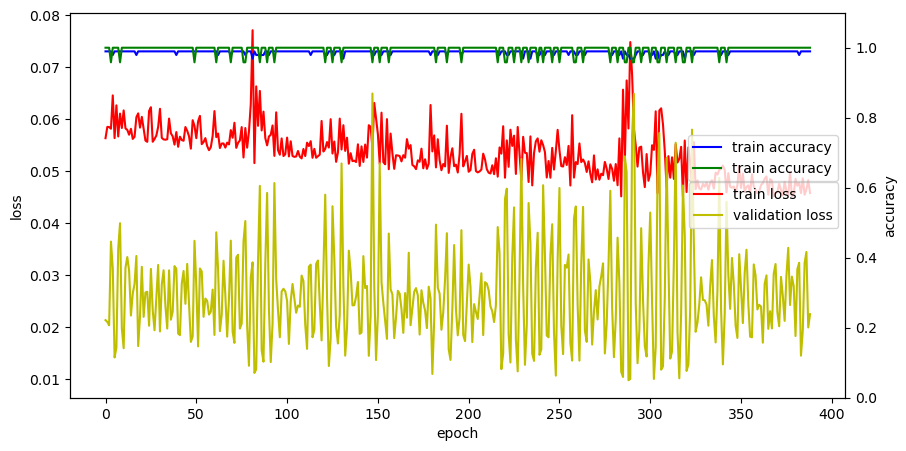

In [55]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
acc_ax.set_ylim(0.0,1.1)
plt.show()

In [13]:
# 모델 평가
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0819 - accuracy: 0.9333


[0.08193601667881012, 0.9333333373069763]

In [27]:
# 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns = list(iris['species'][::50]) #['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 48ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


In [19]:
list(iris['species'][::50])

['setosa', 'versicolor', 'virginica']

In [58]:
# 저장된 모델 중 성능이 제일 좋아 보이는 것 load
from tensorflow.keras.models import load_model
model2 = load_model('model/iris1.h5')

In [59]:
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.8178 - accuracy: 1.0000


[0.8177915215492249, 1.0]

In [45]:
# 저장된 모델의 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model2.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns = list(iris['species'][::50]) #['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 123ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


In [66]:
# 모델 사용하기 (예측하기)
iris[100:101]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica


In [75]:
model2.predict(np.array([[6.3, 3.4, 6.1, 2.5]]))

1/1 [==============================] - 0s 31ms/step


array([[0.10941283, 0.35520747, 0.53537965]], dtype=float32)